 Please run the JSON creators found in PreProcessing folder or download an example by runnnig the commeted code below

In [1]:
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1lDGIkS7QDy7mUDStDtb_fhMR5euF2R6v',dest_path='../resources/icepoints2019-02-08.json')
# gdd.download_file_from_google_drive(file_id='1qgePy_WsVN924fdJhnvcMpqCCRfvUC9i',dest_path='../resources/currentPoints.json')

In [10]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid

#read in Ice  & Currents Points
icePoints     = pd.read_json('../resources/icepoints2019-02-08.json')
icePoints     = pd.DataFrame.from_records(icePoints.icepoints)
currentPoints = pd.read_json('../resources/currentPoints.json')
currentPoints = pd.DataFrame.from_records(currentPoints.currentPoints)

In [11]:
longMin    = 260
longMax    = 360
latMin     = -75
latMax     = -40
cellWidth  = 5
cellHeight = 2.5

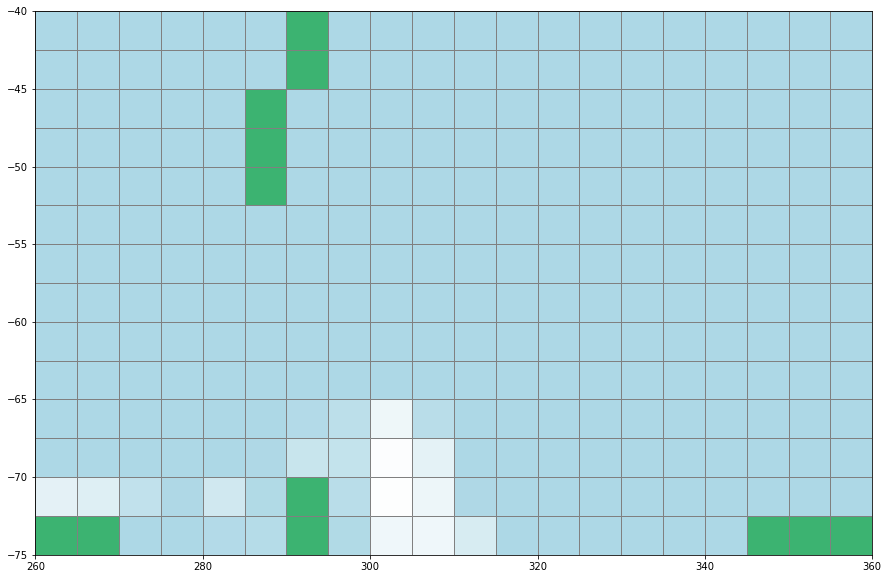

In [12]:
cellGrid = CellGrid(longMin, longMax, latMin, latMax, cellWidth, cellHeight)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
#cellGrid.recursiveSplit(3)
cellGrid.plot()

In [13]:
from RoutePlanner.Optimisation import TravelTime
OptInfo = {}
OptInfo['WayPoints']            = pd.read_csv('../resources/WayPoints_TestExample.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3 #Units km/hr

In [14]:
TT = TravelTime(cellGrid,OptInfo)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = ArgentineSea ===
=== Processing Waypoint = MargueriteBay ===


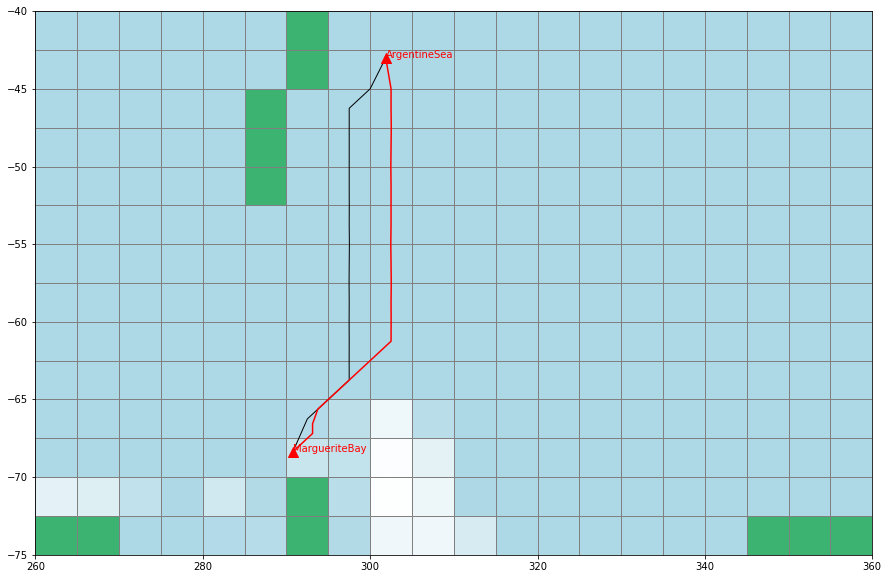

In [15]:
# Loading Ground Truth & Comparing
GT = pd.read_csv('../resources/TestExample_GroundTruth.csv')
GT['Long'] = GT['Long']+360
ax = TT.PlotPaths(waypoints=['ArgentineSea'])
ax.plot(GT['Long'],GT['Lat'],'r')

In [20]:
Path = TT.Paths[0]


array([[300.        , -45.        ],
       [297.49976079, -47.5       ],
       [297.50003689, -50.        ],
       [297.50630432, -52.5       ],
       [297.52185585, -55.        ],
       [297.48482875, -57.5       ],
       [297.48909689, -60.        ],
       [297.49259801, -62.5       ],
       [295.        , -65.        ],
       [291.47992639, -67.5       ]])

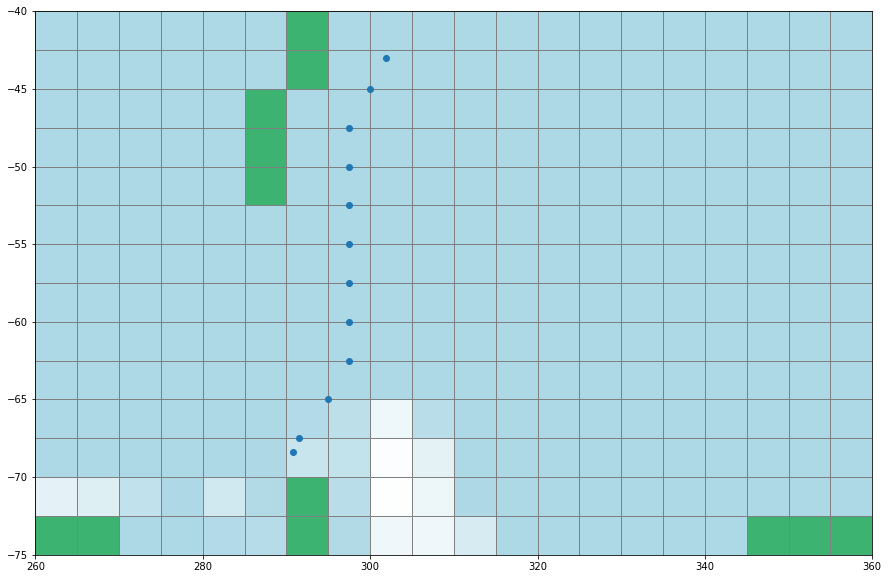

In [27]:
from RoutePlanner.Function import NewtonianDistance, NewtonianCurve

In [30]:
# for id in range(crossingPoints.shape[0]-2):

for idxpt in range(crossingPoints.shape[0]-2):

    Sp  = tuple(crossingPoints[id,:])
    Cp  = tuple(crossingPoints[id+1,:])
    Np  = tuple(crossingPoints[id+2,:])

    nc = NewtonianCurve(TT.Mesh,Sp,Cp,Np,TT.OptInfo['VehicleInfo']['Speed'])


In [38]:
CrossingPoint

array([[295.  , -46.25],
       [297.5 , -47.5 ]])

In [37]:
TravelTime, CrossingPoint = nc.value()

--Corner Case: Xs=[301.87,-43.00]; Xc=[300.00,-45.00]; Xe=[297.50,-47.50];
[[109.   297.5  -46.25]
 [110.   297.5  -43.75]
 [109.   297.5  -46.25]
 [123.   302.5  -46.25]]


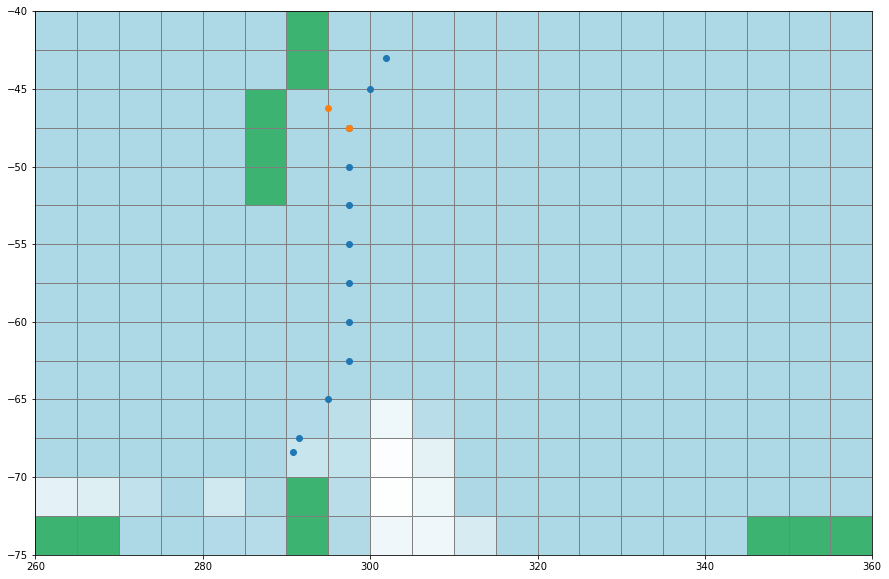

In [39]:
import numpy as np
ax = cellGrid.plot(return_ax=True)

crossingPoints = np.concatenate([Path['Path']['FullPath'][0,:][None,:],
                                 Path['Path']['CrossingPoints'],
                                 Path['Path']['FullPath'][-1,:][None,:]])
ax.scatter(crossingPoints[:,0],crossingPoints[:,1])

ax.scatter(CrossingPoint[:,0],CrossingPoint[:,1])